<a href="https://colab.research.google.com/github/2SEHI/Factory-Anomaly-Analysis/blob/main/3_Display_Sensor_Anomaly_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 본 소스를 실행할 때 필요한 파일
- right_columns.txt : right 컬럼명만 분류해 놓은 파일
- fact_data_vif.csv : 8145 rows × 179 columns (RIGHT, LEFT, CENTER 포함)

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

## DataFrame파일 호출
- fact_data_vif.csv : 8145 rows × 179 columns (RIGHT, LEFT, CENTER 포함)

In [ ]:
working_dir = ''
# working_dir = '/content/drive/MyDrive/Colab Notebooks/k-digital/[Project]Display_Sensor_Anomaly_Analysis/'
fact_data = pd.read_csv(working_dir + 'fact_data_vif.csv', index_col='dat...date.name.')
fact_data

,X1WOS45106_PV,X1WOS45107_PV,X1WOS45109_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,...,S_C1_C2_L_L,S_C2_C3_U_R,S_C3_C4_U_L,투입.LEFT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.
dat...date.name.,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,...,-0.195736,0.410847,2.776941,80.0,2.0,5.0,8.0,3.0,8.75,14.86
2016-01-01 08,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,...,-0.500742,0.397591,2.888919,92.0,0.0,2.0,10.0,0.0,2.17,13.33
2016-01-01 09,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,...,-0.164556,0.460702,2.868644,64.0,1.0,4.0,0.0,0.0,7.81,0.00
2016-01-01 10,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,...,-0.824056,0.411229,2.834358,68.0,0.0,7.0,0.0,0.0,10.29,0.00
2016-01-01 11,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,...,-0.504655,0.393697,2.852398,36.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19,0.126294,0.076956,0.076956,0.147152,-0.227141,1.071701,1.238144,0.867068,1.356492,-0.588255,...,1.059976,-1.179222,-0.142612,98.0,0.0,3.0,14.0,0.0,3.06,14.43
2016-12-31 20,0.126294,0.076956,0.076956,0.147152,-0.227141,1.071701,1.238144,0.867068,1.356492,-0.588255,...,0.805998,-1.274069,-0.187163,96.0,1.0,2.0,13.0,1.0,3.13,13.08
2016-12-31 21,0.126294,0.076956,0.076956,0.147152,-0.227141,1.071701,1.238144,0.867068,1.356492,-0.588255,...,0.626508,-1.229154,-0.127151,117.0,2.0,1.0,11.0,3.0,2.56,12.73


## right 컬럼 제거

In [ ]:
my_file = open("right_columns.txt", "r", encoding='utf-8')
content = my_file. read()
# print(content)
right_columns = content. split(",\n")

cl_columns =[column for column in fact_data if column not in right_columns]
cl_columns

['X1WOS45106_PV',
 'X1WOS45107_PV',
 'X1WOS45109_PV',
 'DCS_Offset_RPM_M11.1WOS45111_PV',
 'DCS_Offset_RPM_M15.1WOS45115_PV',
 'DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV',
 'N2.TO.EA1313A.1FI33503A_PV',
 'ROOF.HEATING.Zone.1.1JIC31101.PV',
 'ROOF.HEATING.Zone.2.1JIC31102.PV',
 'ROOF.HEATING.Zone.3.1JIC31103.PV',
 'ROOF.HEATING.Zone.4.1JIC31104.PV',
 'ATM.FLOW.SECT.9.N2.1FIC33415.PV',
 'Gross.width',
 'Left.edge',
 'LOWER.AB7.Z92.TMP.1TIC41751.PV',
 'UPPER.C2..Z175.TMP.1TIC42307.PV',
 'LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV',
 'LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV',
 'LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV',
 'LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV',
 'LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV',
 'LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV',
 'LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV',
 'LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV',
 'LEHR.DRV.MTR..M10.2.CUR.1WII40117.PV',
 'LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV',
 'LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV',
 'LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV',
 'LEHR.DRV.MTR..M15.1.CUR.1WII401

- right를 제외한 center와 left컬럼만 저장
    - fact_data_lc.csv : 왼쪽과 center의 컬럼만 저장된 csv파일

In [ ]:
fact_data_result = fact_data[cl_columns]
fact_data_result.to_csv(working_dir + 'fact_data_lc.csv')

In [ ]:
len(fact_data_result.columns)

150

<AxesSubplot:>

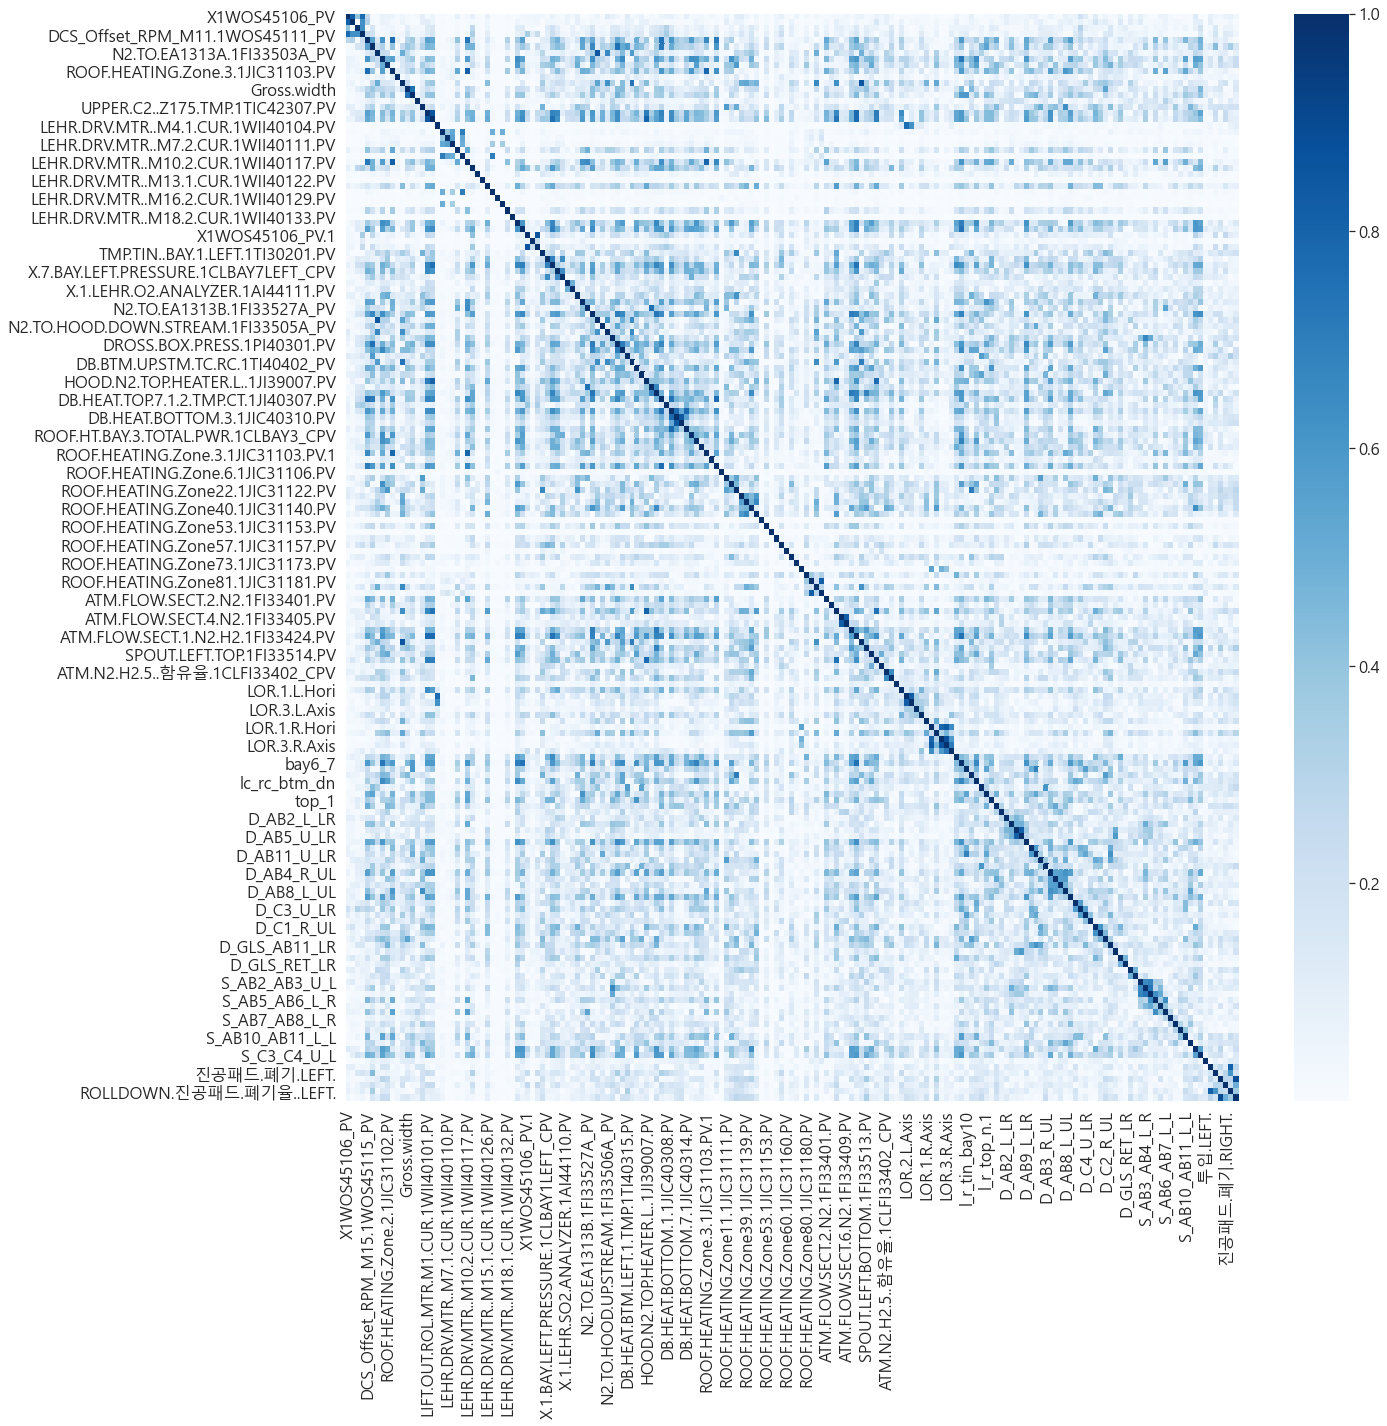

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

font_path = "malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)


corr  = abs(fact_data.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues')

<AxesSubplot:>

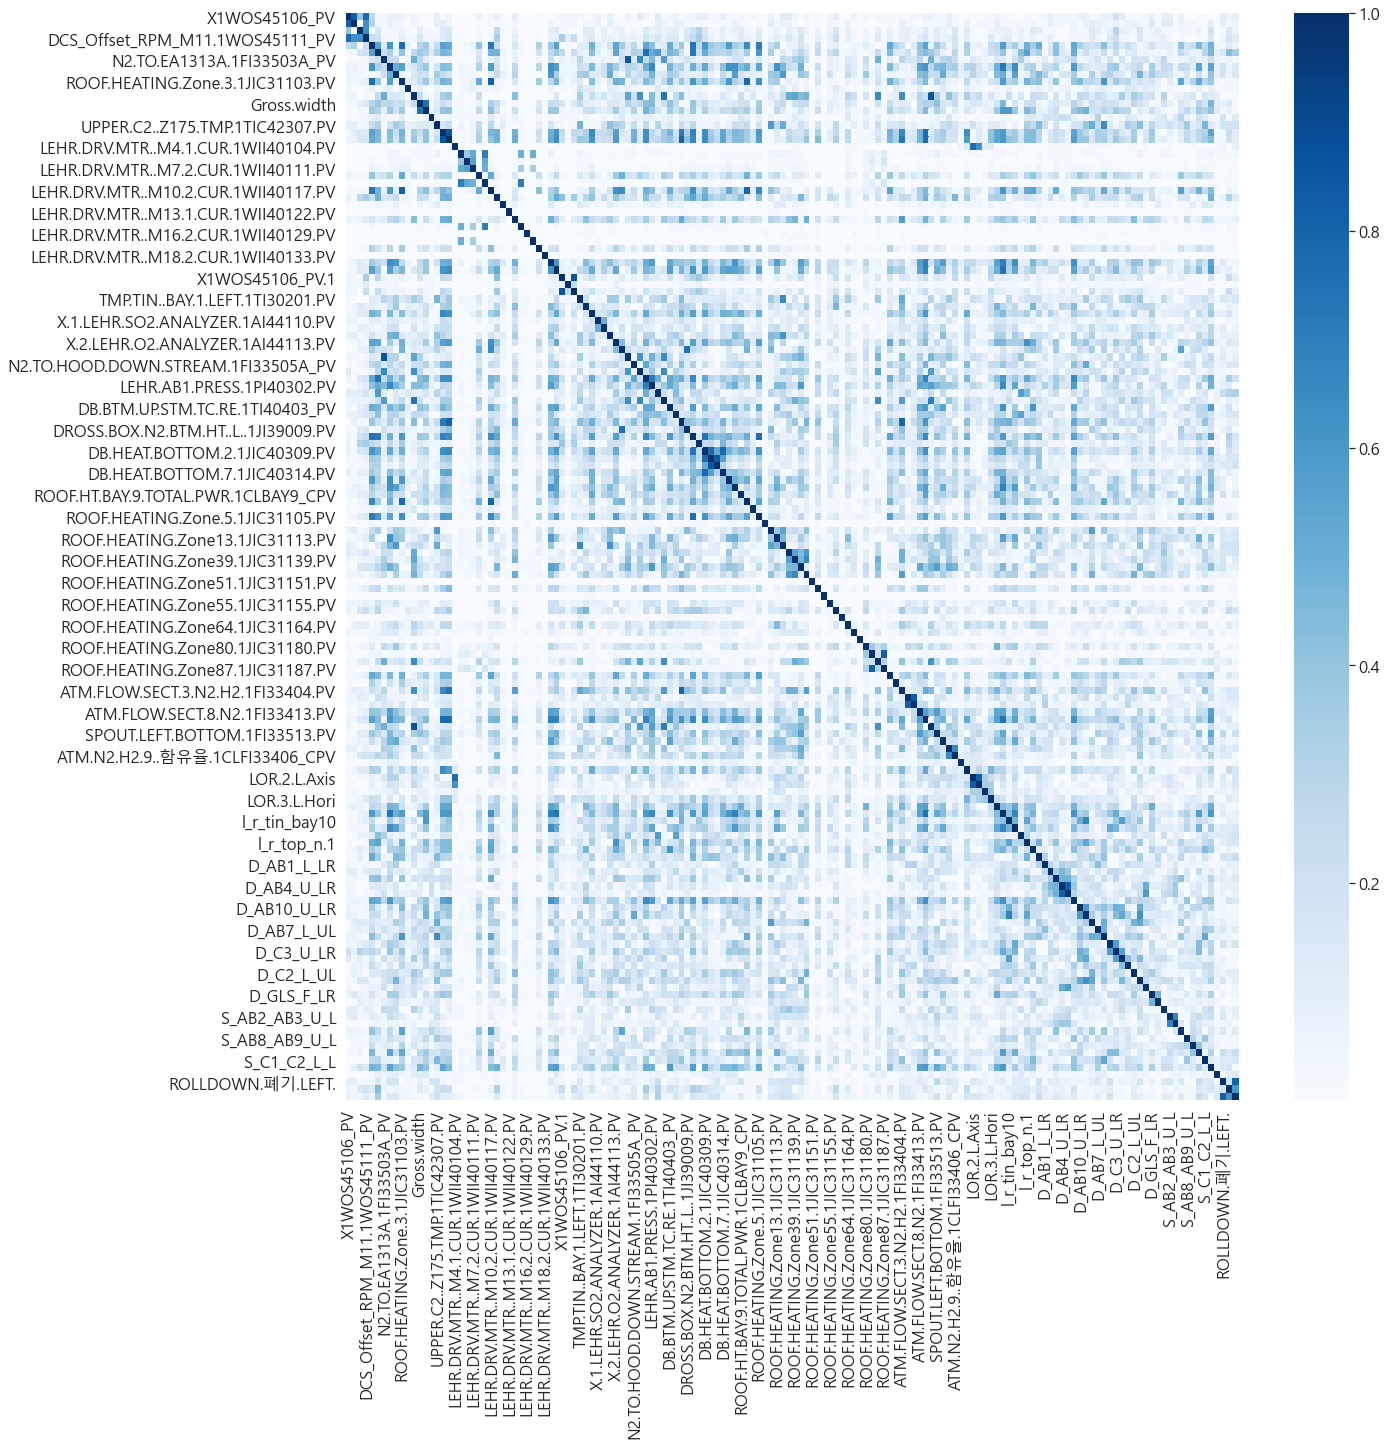

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

font_path = "malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)


corr  = abs(fact_data_result.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues')